In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kkbox-music-recommendation-challenge/test.csv.7z
/kaggle/input/kkbox-music-recommendation-challenge/train.csv.7z
/kaggle/input/kkbox-music-recommendation-challenge/songs.csv.7z
/kaggle/input/kkbox-music-recommendation-challenge/members.csv.7z
/kaggle/input/kkbox-music-recommendation-challenge/song_extra_info.csv.7z
/kaggle/input/kkbox-music-recommendation-challenge/sample_submission.csv.7z


In [82]:
os.system('apt-get install p7zip')
!pip install pyunpack
!pip install patool
from pyunpack.cli import Archive

directory = '/kaggle/working/'
Archive('/kaggle/input/kkbox-music-recommendation-challenge/train.csv.7z').extractall(directory)
Archive('/kaggle/input/kkbox-music-recommendation-challenge/test.csv.7z').extractall(directory)
Archive('/kaggle/input/kkbox-music-recommendation-challenge/songs.csv.7z').extractall(directory)
Archive('/kaggle/input/kkbox-music-recommendation-challenge/members.csv.7z').extractall(directory)
Archive('/kaggle/input/kkbox-music-recommendation-challenge/song_extra_info.csv.7z').extractall(directory)

Reading package lists...
Building dependency tree...
Reading state information...
p7zip is already the newest version (16.02+dfsg-7build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [83]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
songs = pd.read_csv('./songs.csv')
members = pd.read_csv('./members.csv')
songs_extra = pd.read_csv('./song_extra_info.csv')

In [84]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [85]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [86]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [87]:
songs_extra.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


## New features

In [88]:
dict_count_song_played = {k: v for k, v in pd.concat([train['song_id'], test['song_id']], axis=0).value_counts().items()}
def return_number_played(x):
    try:
        return dict_count_song_played[x]
    except KeyError:
        return 0
train['number_of_time_played'] = train['song_id'].apply(lambda x: return_number_played(x))
test['number_of_time_played'] = test['song_id'].apply(lambda x: return_number_played(x))

In [89]:
dict_user_activity = {k:v for k,v in pd.concat([train['msno'] , test['msno']] , axis = 0).value_counts().items()}
def return_user_activity(x):
    try:
        return dict_user_activity[x]
    except KeyError:
        return 0
train['user_activity_msno'] = train['msno'].apply(lambda x: return_user_activity(x))
test['user_activity_msno'] = test['msno'].apply(lambda x: return_user_activity(x))

## Merge dataframes

In [90]:
train = pd.merge(train, songs, on='song_id', how='left')
test = pd.merge(test, songs, on='song_id', how='left')
del songs

In [91]:
train = pd.merge(train, members, on='msno', how='left')
test = pd.merge(test, members, on='msno', how='left')
del members

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   number_of_time_played   int64  
 7   user_activity_msno      int64  
 8   song_length             float64
 9   genre_ids               object 
 10  artist_name             object 
 11  composer                object 
 12  lyricist                object 
 13  language                float64
 14  city                    int64  
 15  bd                      int64  
 16  gender                  object 
 17  registered_via          int64  
 18  registration_init_time  int64  
 19  expiration_date         int64  
dtypes: float64(2), int64(8), object(10)
memory usage: 1.1+ GB


In [93]:
train.isnull().sum()/train.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.336825
source_screen_name         5.622618
source_type                0.291959
target                     0.000000
number_of_time_played      0.000000
user_activity_msno         0.000000
song_length                0.001545
genre_ids                  1.605643
artist_name                0.001545
composer                  22.713990
lyricist                  43.088408
language                   0.002033
city                       0.000000
bd                         0.000000
gender                    40.142486
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [94]:
#Replace NA
for i in train.select_dtypes(include=['object']).columns: 
    train.loc[train[i].isnull(), i] = 'unknown'
train = train.fillna(0)

## Reformat date columns

In [95]:
train.registration_init_time = pd.to_datetime(train.registration_init_time, format='%Y%m%d')
train['registration_init_time_year'] = train['registration_init_time'].dt.year
train['registration_init_time_month'] = train['registration_init_time'].dt.month
train['registration_init_time_day'] = train['registration_init_time'].dt.day

# expiration_date
train.expiration_date = pd.to_datetime(train.expiration_date,  format='%Y%m%d')
train['expiration_date_year'] = train['expiration_date'].dt.year
train['expiration_date_month'] = train['expiration_date'].dt.month
train['expiration_date_day'] = train['expiration_date'].dt.day

In [96]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,number_of_time_played,user_activity_msno,song_length,genre_ids,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,250,7075,206471.0,359,...,unknown,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,1,730,284584.0,1259,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,6,730,225396.0,1259,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,1,730,255512.0,1019,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,474,7075,187802.0,1011,...,unknown,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5


In [97]:
# Dates to categoty
train['registration_init_time'] = train['registration_init_time'].astype('category')
train['expiration_date'] = train['expiration_date'].astype('category')

In [98]:
for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].astype('category')
    
# Encoding categorical features
for col in train.select_dtypes(include=['category']).columns:
    train[col] = train[col].cat.codes

## See corr matrix of features

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

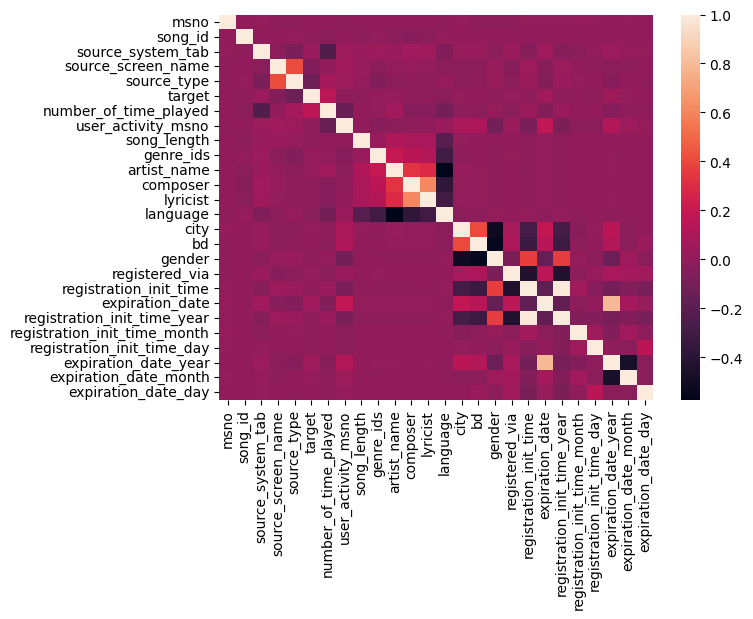

In [100]:
plt.figure(figsize=[7,5])
sns.heatmap(train.corr())
plt.show()

In [101]:
train = train.drop(['expiration_date', 'lyricist'], axis=1)

## Repeat everything with test after merge

In [102]:
for i in test.select_dtypes(include=['object']).columns:
    test.loc[test[i].isnull(), i] = 'unknown'
test = test.fillna(0)
test.registration_init_time = pd.to_datetime(test.registration_init_time, format='%Y%m%d')
test['registration_init_time_year'] = test['registration_init_time'].dt.year
test['registration_init_time_month'] = test['registration_init_time'].dt.month
test['registration_init_time_day'] = test['registration_init_time'].dt.day

# expiration_date
test.expiration_date = pd.to_datetime(test.expiration_date,  format='%Y%m%d')
test['expiration_date_year'] = test['expiration_date'].dt.year
test['expiration_date_month'] = test['expiration_date'].dt.month
test['expiration_date_day'] = test['expiration_date'].dt.day

test['registration_init_time'] = test['registration_init_time'].astype('category')
test['expiration_date'] = test['expiration_date'].astype('category')

for col in test.select_dtypes(include=['object']).columns:
    test[col] = test[col].astype('category')
    
# Encoding categorical features
for col in test.select_dtypes(include=['category']).columns:
    test[col] = test[col].cat.codes
test = test.drop(['expiration_date', 'lyricist'], axis=1)

## Feature importance with random forest

In [103]:
from sklearn import ensemble, model_selection
import xgboost as xgb

In [104]:
df = train.sample(frac=0.01) # THIS STEP COULD BE EARLIER INSTEAD OF ANALYSIS AND FEATURE ENGINEERING ALL ITEMS

In [105]:
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'target']], df.target)

RandomForestClassifier(max_depth=25, n_estimators=250)

In [106]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

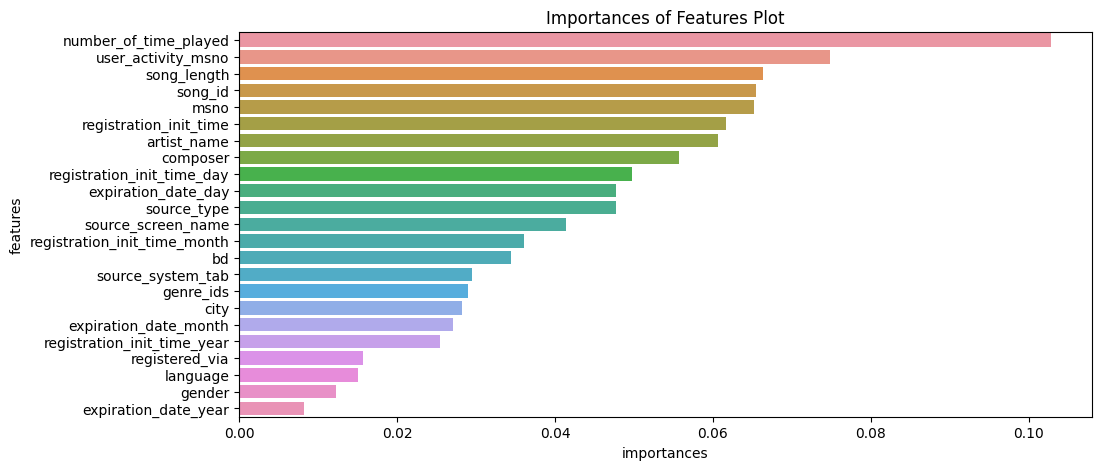

In [107]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [109]:
# Drop columns with importances < 0.04
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), axis=1)

In [110]:
#Selected columns
df.columns

Index(['msno', 'song_id', 'source_screen_name', 'source_type', 'target',
       'number_of_time_played', 'user_activity_msno', 'song_length',
       'artist_name', 'composer', 'registration_init_time',
       'registration_init_time_day', 'expiration_date_day'],
      dtype='object')

## XGboost

In [111]:
# Train & Test split
target = df.pop('target')
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(df, target, test_size = 0.3)
# Delete df
del df

In [115]:
# Create model

model = xgb.XGBClassifier()

# Create parameters grid

parameters_grid = { 'learning_rate' : [0.1, 0.2, 0.5], 'max_depth' : [5, 10, 15], 'n_estimators' : [150, 250, 300], 'min_child_weight' : [3, 5, 10] }

# Strategy of cross validation

cv = model_selection.StratifiedShuffleSplit(n_splits = 3, test_size = 0.3)

# Create Grid search Strategy

grid_cv = model_selection.RandomizedSearchCV(model, parameters_grid, scoring = 'accuracy', cv = cv)

# Fit model by Grid

grid_cv.fit(train_data, train_labels)

# Model with the best estimator

grid_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [116]:
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=250)
model.fit(train_data, train_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [117]:
predict_labels = model.predict(test_data)

## Count NDCG@20

In [120]:
from sklearn.metrics import ndcg_score
ndcg_score([test_labels], [predict_labels], k=20)

0.6446556611639152